In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## Data Cleaning

An order may have multiple items \
Each item may be fulfilled by different sellers \
All text identifying stores and partners have been replaced with Game of Thrones great houses


Read in all 9 datasets

In [23]:
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
seller_info = pd.read_csv('olist_sellers_dataset.csv')
customers_data = pd.read_csv('olist_customers_dataset.csv')
order_items_info = pd.read_csv('olist_order_items_dataset.csv')
order_payments_info = pd.read_csv('olist_order_payments_dataset.csv')
order_info = pd.read_csv('olist_orders_dataset.csv')
product_info = pd.read_csv('olist_products_dataset.csv')
product_category_name = pd.read_csv('product_category_name_translation.csv')

### Order Payments Dataset

In [24]:
order_payments_info.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Order Information Dataset

In [25]:
order_info.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [26]:
order_info['Time_Delivery-Purchase'] = pd.to_datetime(order_info['order_delivered_customer_date']) - \
                                         pd.to_datetime(order_info['order_purchase_timestamp'])

In [27]:
order_info['Time_Delivery-Purchase'] = order_info['Time_Delivery-Purchase'].dt.days

In [30]:
# Drop all irrelevant columns

order_info.drop(columns=['order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                        'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1,
               inplace=True)

In [31]:
order_info.head()

,order_id,customer_id,Time_Delivery-Purchase
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2.0


### Product Information Dataset

In [32]:
product_info.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [34]:
# Only description length and number of photos matter in this case when reviewing a product. 
# Possibly product weight and product name length maybe a factor when reviewing
product_info.drop(columns=['product_category_name','product_length_cm', 'product_height_cm', 
                           'product_width_cm'], axis=1, inplace=True)

product_info.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0


### Seller Info Dataset

In [35]:
seller_info.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [41]:
len(seller_info['seller_state'].value_counts())

23

In [42]:
seller_info.drop(columns=['seller_zip_code_prefix', 'seller_city'], axis=1, inplace=True)

In [44]:
seller_info.head(2)

,seller_id,seller_state
0,3442f8959a84dea7ee197c632cb2df15,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,SP


### Customers Dataset

In [45]:
customers_data.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [47]:
customers_data.drop(columns=['customer_city', 'customer_zip_code_prefix'], inplace=True)

In [48]:
customers_data.head(2)

,customer_id,customer_unique_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP


### Order_reviews Dataset

In [51]:
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5,NaN,"Perfeito, produto entregue antes do combinado.",21/09/2017 00:00,22/09/2017 10:57
1,7b07bacd811c4117b742569b04ce3580,00018f77f2f0320c557190d7a144bdd3,4,NaN,NaN,13/05/2017 00:00,15/05/2017 11:34


<AxesSubplot:xlabel='review_score', ylabel='count'>

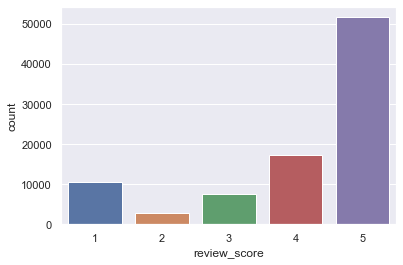

In [49]:
sns.countplot(x='review_score', data=order_reviews) # Huge class imbalance!

#### Split into top reviews i.e. review score 5 and other reviews i.e. 1,2,3,4

In [54]:
order_reviews['review_classification'] = np.where(order_reviews['review_score'] < 5, 'Normal Review', 'Top Review')

<AxesSubplot:xlabel='review_classification', ylabel='count'>

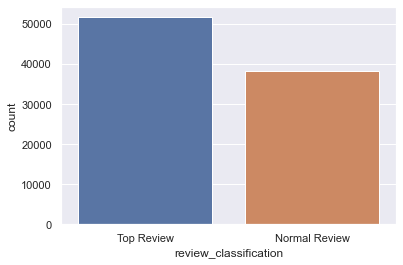

In [55]:
sns.countplot(x='review_classification', data=order_reviews)

In [56]:
order_reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'review_classification'],
      dtype='object')

In [58]:
#Drop most of the columns in orders_review dataset
order_reviews.drop(columns=['review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'], axis=1, inplace=True)

order_reviews.head(3)

,review_id,order_id,review_classification
0,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,Top Review
1,7b07bacd811c4117b742569b04ce3580,00018f77f2f0320c557190d7a144bdd3,Normal Review
2,0c5b33dea94867d1ac402749e5438e8b,000229ec398224ef6ca0657da4fc703e,Top Review


With unique review ids, there can be duplicated order ids and product ids as one review can be regarding two products of the same order or reviews of the same product by multiple customers!

In [59]:
order_reviews.drop_duplicates(subset=['review_id'], inplace=True)

In [60]:
print(order_reviews['order_id'].duplicated().sum())
print(order_reviews['review_id'].duplicated().sum())

261
0


In [62]:
# Check null values for review id
order_reviews['review_id'].isnull().sum()

0

### Order info Dataset

In [63]:
order_items_info.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## Merging Data

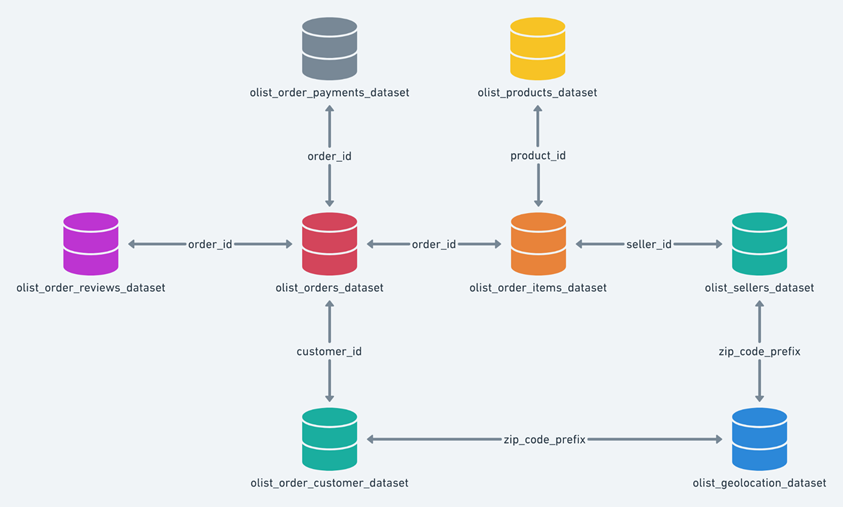

#### Order info and reviews data merge

In [66]:
order_reviews.shape

(89322, 3)

In [65]:
# Merging the order info (orders_dataset) dataset with the reviews dataset based on order id
x1 = pd.merge(order_info, order_reviews, on='order_id', how='inner')
print(x1.shape)
x1.head()

(89322, 5)


,order_id,customer_id,Time_Delivery-Purchase,review_id,review_classification
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,8.0,a54f0611adc9ed256b57ede6b6eb5114,Normal Review
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,13.0,8d5266042046a06655c8db133d120ba5,Normal Review
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,9.0,e73b67b67587f7644d5bd1a52deb1b01,Top Review
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,13.0,359d03e676b3c069f62cadba8dd3f6e8,Top Review
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2.0,e50934924e227544ba8246aeb3770dd4,Top Review


In [69]:
# Check Duplicated
print(x1.duplicated().sum())
print(x1['review_id'].duplicated().sum())

0
0


In [76]:
x1.isna().sum()

order_id                     0
customer_id                  0
Time_Delivery-Purchase    2623
review_id                    0
review_classification        0
dtype: int64

In [77]:
# Dropping all the null values
x1.dropna(inplace=True)
x1.isna().sum()

order_id                  0
customer_id               0
Time_Delivery-Purchase    0
review_id                 0
review_classification     0
dtype: int64

#### Merging order info with customer dataset

In [79]:
# Merging the customer data on x1(previous merge) on customer id (inner join)
x2 = pd.merge(customers_data, x1, on='customer_id', how='inner')
print(x2.duplicated().sum())
print(x2['review_id'].duplicated().sum())
print(x2.isna().sum())

0
0
customer_id               0
customer_unique_id        0
customer_state            0
order_id                  0
Time_Delivery-Purchase    0
review_id                 0
review_classification     0
dtype: int64


In [80]:
x2.head()

,customer_id,customer_unique_id,customer_state,order_id,Time_Delivery-Purchase,review_id,review_classification
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,8.0,88b8b52d46df026a9d1ad2136a59b30b,Normal Review
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,26.0,5ad6695d76ee186dc473c42706984d87,Top Review
2,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,14.0,059a801bb31f6aab2266e672cab87bc5,Top Review
3,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,11.0,8490879d58d6c5d7773f2739a03f089a,Top Review
4,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,SC,5741ea1f91b5fbab2bd2dc653a5b5099,13.0,9a6614162d285301aa3ef6de4be75265,Top Review


In [81]:
x2.drop(columns=['customer_state'], inplace=True)

#### Order payments merging with x2

In [82]:
x3 = pd.merge(order_payments_info, x2, on='order_id', how='inner')
print(x3.duplicated().sum())
print(x3['review_id'].duplicated().sum())
print(x3.isna().sum())

0
3877
order_id                  0
payment_sequential        0
payment_type              0
payment_installments      0
payment_value             0
customer_id               0
customer_unique_id        0
Time_Delivery-Purchase    0
review_id                 0
review_classification     0
dtype: int64


In [83]:
print(x3['review_id'].duplicated().sum())
x3.drop_duplicates(subset=['review_id'], inplace=True)
print(x3['review_id'].duplicated().sum())

3877
0


### Order items on x3

In [84]:
x4 = pd.merge(order_items_info, x3, on='order_id', how='inner')
x4.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,Time_Delivery-Purchase,review_id,review_classification
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,7.0,97ca439bc427b48bc1cd7177abe71365,Top Review
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,16.0,7b07bacd811c4117b742569b04ce3580,Normal Review
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,7.0,0c5b33dea94867d1ac402749e5438e8b,Top Review
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,6.0,f4028d019cb58564807486a6aaf33817,Normal Review
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,25.0,940144190dcba6351888cafa43f3a3a5,Top Review


In [85]:
print(x4.duplicated().sum())
print(x4['review_id'].duplicated().sum())
print(x4.isna().sum())

0
12424
order_id                  0
order_item_id             0
product_id                0
seller_id                 0
shipping_limit_date       0
price                     0
freight_value             0
payment_sequential        0
payment_type              0
payment_installments      0
payment_value             0
customer_id               0
customer_unique_id        0
Time_Delivery-Purchase    0
review_id                 0
review_classification     0
dtype: int64


In [87]:
x4.drop_duplicates(subset=['review_id'], inplace=True)

In [88]:
x4.shape

(86698, 16)

### Product info on x4

In [89]:
x5 = pd.merge(product_info, x4, on='product_id', how='inner') # merging on product id 
x5.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,Time_Delivery-Purchase,review_id,review_classification
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,1,debit_card,1,18.30,f8a3e963a310aa58b60a5b1fed5bceb5,b1a1199364a4a7fe27c4486ab63f550d,3.0,d71da8fd8c6e3adef26be965f065b8a1,Top Review
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,1,voucher,1,265.99,03fc97548af8f58fefc768d12b546c9c,4b86049cb99e4aa774031daa9cd18f18,15.0,19866247db89845ef558ef19a6c26fcd,Top Review
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,1,credit_card,1,87.62,e41819d1c95c12c9ce495b630eab8aee,f63805d9c7edb84d92413af34b86a39c,2.0,32921b4e09c9a19d61fe46ce04231b84,Top Review
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,1,credit_card,2,121.84,322162b5ca010c2b059cb5224dd818b1,619e926d09b26efbd5180368b1ddc874,3.0,70949d129965fb1ee32aaccec720a19e,Normal Review
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,1,credit_card,4,46.19,c11c31965ff02cc1d7132df8edfcbc22,ad353b4fb0e294adc4eda48af73e68a6,2.0,74c9c7d0bc153bbbc92e4c1597b8ba55,Top Review


In [94]:
print(x5.duplicated().sum())
print(x5['review_id'].duplicated().sum())
print(x5.isna().sum())
x5.dropna(inplace=True)
print(x5.isna().sum())

0
0
product_id                       0
product_name_lenght           1225
product_description_lenght    1225
product_photos_qty            1225
product_weight_g                16
order_id                         0
order_item_id                    0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_id                      0
customer_unique_id               0
Time_Delivery-Purchase           0
review_id                        0
review_classification            0
dtype: int64
product_id                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
order_id                      0
order_item_id                 0
seller_id                     0
shipping_limit_date        

In [95]:
x5.shape

(85472, 20)

### Seller information on x5

In [96]:
# Unique review ids but duplicate product and seller ids is fine 

In [97]:
x6 = pd.merge(seller_info, x5, on='seller_id', how='inner')
print(x6.shape)
x6.head()


(85472, 21)


,seller_id,seller_state,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,order_id,order_item_id,shipping_limit_date,...,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,customer_unique_id,Time_Delivery-Purchase,review_id,review_classification
0,3442f8959a84dea7ee197c632cb2df15,SP,ffb64e34a37740dafb6c88f1abd1fa61,26.0,417.0,3.0,700.0,4a90af3e85dd563884e2afeab1091394,1,2017-08-25 20:50:19,...,9.56,1,credit_card,2,115.76,9d6837f9700a3441e7183bff3bc4eef0,f421a2a66b69dbfe6db0c87845281a90,8.0,88980a9c50a6909fa1fe35ddab8fa1e2,Top Review
1,3442f8959a84dea7ee197c632cb2df15,SP,f4621f8ad6f54a2e3c408884068be46d,27.0,485.0,2.0,600.0,6d953888a914b67350d5bc4d48f2acab,1,2017-05-11 16:25:11,...,15.92,1,credit_card,2,117.62,a973c4e3ad82777add3fa188f91dacea,b4527423469300ee354458e1b5f961be,28.0,b9b791819c5c1a5c6a4ffc7881f97fb5,Normal Review
2,d1b65fc7debc3361ea86b5f14c68d2e2,SP,55103cbbe0851d3a303a022cc4140628,32.0,1064.0,5.0,2900.0,7a95f5626df09176d8823cbce3d9db1e,1,2017-08-17 23:30:18,...,23.40,1,credit_card,5,223.30,5511a7cbeae2a3a17ce3598944a5793e,fbc9c3a06d228159f866fd7bcd32febe,3.0,8816e1e0b0ceeffac222674d6be7621a,Top Review
3,d1b65fc7debc3361ea86b5f14c68d2e2,SP,1c36a5285f7f3b1ed2637d7c528ce5ff,21.0,769.0,4.0,1600.0,06e4e324b83309e575442446e34377d7,1,2017-06-30 02:25:24,...,22.70,1,boleto,1,122.60,28635c64d8f2aee6e47124350f7ffb38,f95a2fb1caacbd10edbe4afa7a5980f8,5.0,b793725422d848517417f2e9ac1d4eb9,Top Review
4,d1b65fc7debc3361ea86b5f14c68d2e2,SP,1c36a5285f7f3b1ed2637d7c528ce5ff,21.0,769.0,4.0,1600.0,6d771a62f8e59777188b20db61acb214,1,2017-10-09 15:07:16,...,45.09,1,credit_card,3,135.08,da2468255bbed189389e37ff2b98c534,fe99c37acdbd978fecb62eea4c58f415,4.0,1a6abde308f070c764bfebdbe3f18c3d,Normal Review


In [99]:
print(x6.duplicated().sum())
print(x6['review_id'].duplicated().sum())
print(x6.isna().sum())

0
0
seller_id                     0
seller_state                  0
product_id                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
order_id                      0
order_item_id                 0
shipping_limit_date           0
price                         0
freight_value                 0
payment_sequential            0
payment_type                  0
payment_installments          0
payment_value                 0
customer_id                   0
customer_unique_id            0
Time_Delivery-Purchase        0
review_id                     0
review_classification         0
dtype: int64


In [100]:
x6.columns

Index(['seller_id', 'seller_state', 'product_id', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'order_id', 'order_item_id', 'shipping_limit_date', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_id',
       'customer_unique_id', 'Time_Delivery-Purchase', 'review_id',
       'review_classification'],
      dtype='object')

## Feature Engineering

In [102]:
x6.drop(columns=['seller_id', 'seller_state', 'product_id', 'order_id', 'order_item_id', 'shipping_limit_date',
                
                'customer_id','customer_unique_id','review_id'], inplace=True)

x6.head()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,Time_Delivery-Purchase,review_classification
0,26.0,417.0,3.0,700.0,106.20,9.56,1,credit_card,2,115.76,8.0,Top Review
1,27.0,485.0,2.0,600.0,101.70,15.92,1,credit_card,2,117.62,28.0,Normal Review
2,32.0,1064.0,5.0,2900.0,199.90,23.40,1,credit_card,5,223.30,3.0,Top Review
3,21.0,769.0,4.0,1600.0,99.90,22.70,1,boleto,1,122.60,5.0,Top Review
4,21.0,769.0,4.0,1600.0,89.99,45.09,1,credit_card,3,135.08,4.0,Normal Review


In [104]:
df = pd.get_dummies(x6, columns=['payment_type'], drop_first=True)

### Checking Multicollinearity

In [125]:
df.columns

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'price', 'freight_value',
       'payment_sequential', 'payment_installments', 'payment_value',
       'Time_Delivery-Purchase', 'review_classification',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_voucher'],
      dtype='object')

<AxesSubplot:>

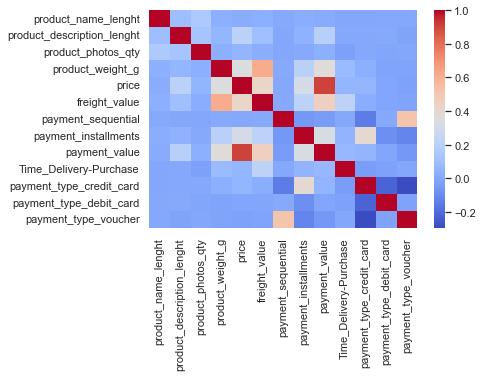

In [126]:
sns.heatmap(df[['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'price', 'freight_value',
       'payment_sequential', 'payment_installments', 'payment_value',
       'Time_Delivery-Purchase',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_voucher']].corr(), cmap='coolwarm')

In [127]:
# Drop payment sequential, product_weight_g, and payment value
df.drop(columns=['payment_value', 'payment_sequential', 'product_weight_g'], inplace=True)

<AxesSubplot:>

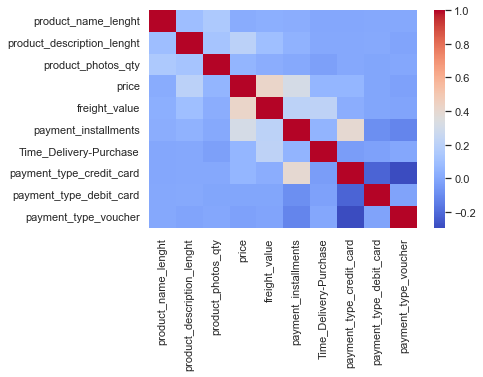

In [129]:
sns.heatmap(df[['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'price', 'freight_value', 'payment_installments',
       'Time_Delivery-Purchase',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_voucher']].corr(), cmap='coolwarm')

## Train Test Split,  Standardize and Oversampling

In [441]:
X = df.drop('review_classification', axis=1)
y = df['review_classification']

In [442]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit(X).transform(X)

In [443]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=102)

In [444]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [445]:
X_train.shape

(82652, 10)

## Using different ML models

### Gradient Boosting

In [446]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [447]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [448]:
predictions_boosting = gb.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, predictions_boosting))
print(confusion_matrix(y_test, predictions_boosting))

               precision    recall  f1-score   support

Normal Review       0.58      0.36      0.45      6287
   Top Review       0.65      0.82      0.72      9098

     accuracy                           0.63     15385
    macro avg       0.61      0.59      0.59     15385
 weighted avg       0.62      0.63      0.61     15385

[[2278 4009]
 [1653 7445]]


In [449]:
acc_gb = gb.score(X_test, y_test)

In [450]:
acc_gb

0.631979200519987

### Random Forest Classifer

In [451]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
predictions_Random_forest = rf.predict(X_test)

print(classification_report(y_test, predictions_Random_forest))
print(confusion_matrix(y_test, predictions_Random_forest))

               precision    recall  f1-score   support

Normal Review       0.52      0.42      0.46      6287
   Top Review       0.64      0.73      0.69      9098

     accuracy                           0.60     15385
    macro avg       0.58      0.57      0.57     15385
 weighted avg       0.59      0.60      0.59     15385

[[2610 3677]
 [2439 6659]]


In [452]:
rf_acc = rf.score(X_test, y_test)
rf.score(X_test, y_test)

0.6024699382515437

### XG Boost

In [453]:
import warnings
warnings.filterwarnings('ignore')

In [454]:
from xgboost import XGBClassifier

In [455]:
# fit model on training data
xg = XGBClassifier()

xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[21:18:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
               precision    recall  f1-score   support

Normal Review       0.60      0.32      0.41      6287
   Top Review       0.64      0.85      0.73      9098

     accuracy                           0.63     15385
    macro avg       0.62      0.58      0.57     15385
 weighted avg       0.62      0.63      0.60     15385

[[1986 4301]
 [1351 7747]]


In [456]:
xg_acc = xg.score(X_test, y_test)
xg.score(X_test, y_test)

0.6326291842703933

### Ensemble Methods

In [457]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [458]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = GradientBoostingClassifier()

In [459]:
eclf1 = VotingClassifier(estimators=[
       ('lr', clf1), ('rf', clf2), ('gb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

In [460]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

               precision    recall  f1-score   support

Normal Review       0.56      0.41      0.47      6287
   Top Review       0.66      0.78      0.71      9098

     accuracy                           0.63     15385
    macro avg       0.61      0.59      0.59     15385
 weighted avg       0.62      0.63      0.61     15385

[[2551 3736]
 [2005 7093]]


In [461]:
eclf1.score(X_test, y_test)

0.6268443288917777

In [462]:
ens_acc = eclf1.score(X_test, y_test)

### Bagging

In [463]:
bg = BaggingClassifier()
bg.fit(X_train, y_train)
y_pred = bg.predict(X_test)
bg_acc = bg.score(X_test, y_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(bg_acc)

               precision    recall  f1-score   support

Normal Review       0.47      0.49      0.48      6287
   Top Review       0.64      0.61      0.62      9098

     accuracy                           0.56     15385
    macro avg       0.55      0.55      0.55     15385
 weighted avg       0.57      0.56      0.56     15385

[[3103 3184]
 [3553 5545]]
0.5621059473513162


### KNNs

In [464]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = knn.score(X_test, y_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(knn_acc)

               precision    recall  f1-score   support

Normal Review       0.46      0.52      0.49      6287
   Top Review       0.64      0.58      0.61      9098

     accuracy                           0.56     15385
    macro avg       0.55      0.55      0.55     15385
 weighted avg       0.57      0.56      0.56     15385

[[3286 3001]
 [3834 5264]]
0.5557361065973351


### Logistic Regression

In [465]:
lr=LogisticRegression(C=1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_acc = lr.score(X_test, y_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(lr_acc)

               precision    recall  f1-score   support

Normal Review       0.52      0.48      0.50      6287
   Top Review       0.66      0.69      0.67      9098

     accuracy                           0.60     15385
    macro avg       0.59      0.59      0.59     15385
 weighted avg       0.60      0.60      0.60     15385

[[3047 3240]
 [2844 6254]]
0.6045498862528437


### Decision Tree Classifier

In [466]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
tree_acc = tree.score(X_test, y_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(tree_acc)

               precision    recall  f1-score   support

Normal Review       0.45      0.47      0.46      6287
   Top Review       0.63      0.61      0.62      9098

     accuracy                           0.55     15385
    macro avg       0.54      0.54      0.54     15385
 weighted avg       0.56      0.55      0.55     15385

[[2981 3306]
 [3576 5522]]
0.5526811829704258


## Selecting the best model

In [467]:
data = {'Algorithms': ['Gradient Boosting', 'Bagging', 'Logistic Regression', 'KNNs', 'Random Forest',
                       'Decision Trees', 'Ensemble Methods', 'XG Boosting'],
       'Accuracy_Scores': [acc_gb, bg_acc, lr_acc, knn_acc, rf_acc, tree_acc, ens_acc, xg_acc]}

In [468]:
df_2 = pd.DataFrame(data)
df_2.sort_values(by='Accuracy_Scores', ascending=False)

,Algorithms,Accuracy_Scores
7,XG Boosting,0.632629
0,Gradient Boosting,0.631979
6,Ensemble Methods,0.626844
2,Logistic Regression,0.604550
4,Random Forest,0.602470
1,Bagging,0.562106
3,KNNs,0.555736
5,Decision Trees,0.552681


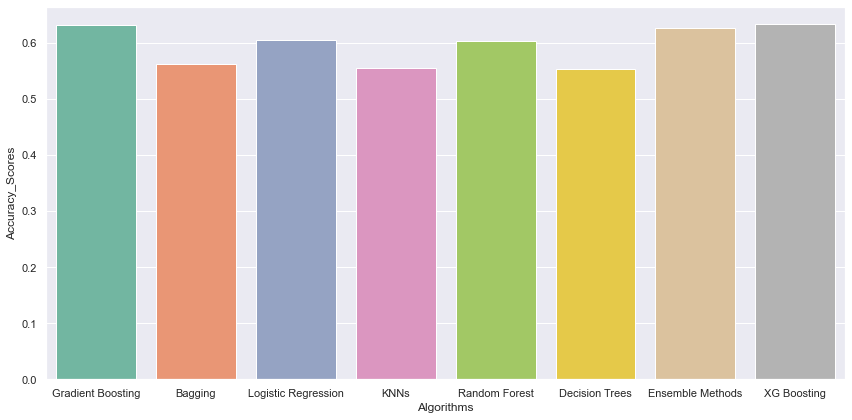

In [469]:
plt.figure(figsize=(12,6))
sns.barplot(x='Algorithms', y='Accuracy_Scores', data=df_2, palette='Set2')
plt.tight_layout()

XG Boosting seems to perform the best before hyperparameter tuning on the testing set and thus, will be selected for further hyperparameter enhancements

In [520]:
xg = XGBClassifier(eta=0.1, eval_metric='mae')

xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
xg.score(X_test, y_test)

               precision    recall  f1-score   support

Normal Review       0.61      0.32      0.42      6287
   Top Review       0.65      0.86      0.74      9098

     accuracy                           0.64     15385
    macro avg       0.63      0.59      0.58     15385
 weighted avg       0.63      0.64      0.61     15385

[[1999 4288]
 [1278 7820]]


0.6382190445238869